## HOMEWORK 5   524 SPRING 2023

## NAME: Skylar Hou

## Q1

In [1]:
## Starter code for question 1

using CSV, DataFrames
using PyPlot, JuMP, HiGHS

# read and convert into an array
vtarget = CSV.read(joinpath(@__DIR__, "voltages.csv"), DataFrame, header=false);
vtarget = Array(vtarget[:, 1]);

In [2]:
using Pkg
Pkg.add("Gurobi")

    Updating registry at `C:\Users\X\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`


In [3]:
## More Starter code for question 1. You could use this code inside a function called "plotmodel(lambda)", 
## and then call plotmodel with three values of lambda to get the required plots.

function plotv(vopt)
    PyPlot.svg(false)
    # Use Latex for nice-looking axis titles
    PyPlot.rc("text", usetex=false)
    # Create a figure
    figure(figsize=(10, 3))
    # Set the limit to axes
    axis([0, 200, -2.5, 2.5])
    xlabel("textrm{time}")
    ylabel("textrm{voltage}")
    PyPlot.tight_layout()

    # set ticks
    ax = gca()
    mx = matplotlib[:ticker][:MultipleLocator](10) # Define interval of major ticks
    ax[:xaxis][:set_major_locator](mx) # Set interval of major ticks

    my = matplotlib[:ticker][:MultipleLocator](.5)
    ax[:yaxis][:set_major_locator](my)

    # plot the target voltages
    step(vtarget,"b-")

    # add a dummy plot aside of it (you will need to replace this with your own plot)
    step(vopt,"r-")
end
;

In [4]:
using Gurobi

time = 1:200

function smoothing(λ)
    m = Model(Gurobi.Optimizer)
    
    @variable(m, v[time])
    @expression(m, R, sum((v[i+1]-v[i])^2 for i in 1:199))
    @expression(m, M, sum((vtarget[i]-v[i])^2 for i in time))
    
    @objective(m, Min, M + λ * R )
    optimize!(m)
    return value.(v)
end
;

In [5]:
lambda1 = smoothing(1)
lambda2 = smoothing(10)
lambda3 = smoothing(100)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-24
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 0 rows, 200 columns and 0 nonzeros
Model fingerprint: 0xa1284f32
Model has 399 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 4e+00]
  QObjective range [4e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.01s
Presolved: 0 rows, 200 columns, 0 nonzeros
Presolved model has 399 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 399
 AA' NZ     : 4.700e+02
 Factor NZ  : 2.449e+03
 Factor Ops : 3.695e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Prima

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 1:200
And data, a 200-element Vector{Float64}:
  0.4587764189192464
  0.46336418310844507
  0.4725855891287346
  0.4865328510403178
  0.5053454414623112
  0.5292114862989338
  0.558369645998554
  0.5931115021581669
  0.633784473339368
  0.6807952892539691
  0.7346140580611226
  0.7857789674489022
  0.8348016665111897
  ⋮
 -0.7582746924261191
 -0.7092238078597581
 -0.6572651613719979
 -0.6118791664979839
 -0.5726119632889481
 -0.5390708797128141
 -0.5109205049338039
 -0.4878793352041509
 -0.46971695882654446
 -0.45625175203720364
 -0.44734906276824216
 -0.442919864126973

top to bottom: λ = 1, λ = 10, λ = 100

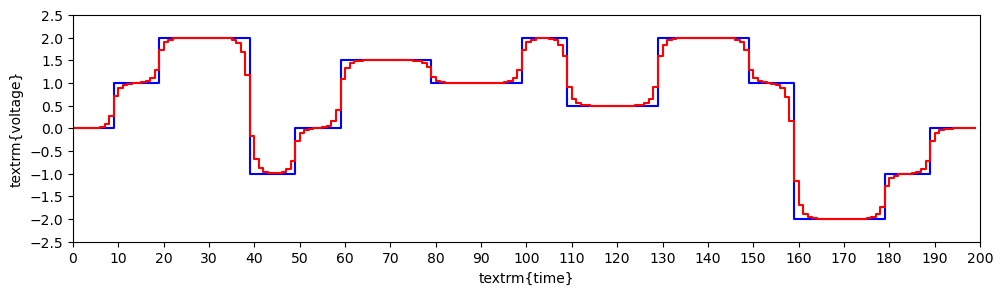

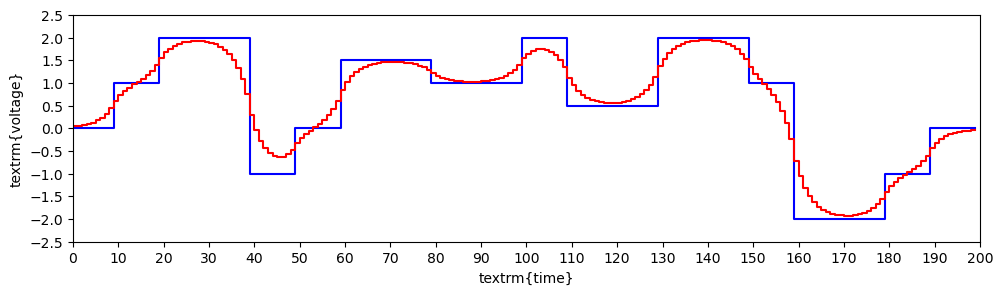

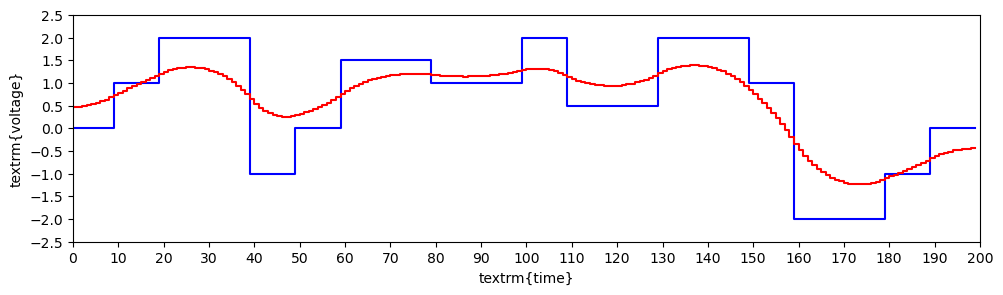

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000002268DE21BE0>

In [6]:
print("top to bottom: λ = 1, λ = 10, λ = 100")
plotv(lambda1)
plotv(lambda2)
plotv(lambda3)

## Q2

### a) Polynomial fit

In [7]:
## Starter code for question 2
  
A = CSV.read(joinpath(@__DIR__, "xy_data.csv"), DataFrame, header=false)
x = A[:,1]
y = A[:,2]

function plotpoints()
    figure(figsize=(10,3))
    xlabel("light intensity")
    ylabel("fluorescence")
    # set the x axis to have ticks 0-10
    xticks(0:10)

    plot(x, y, "b.")
end

function plot2(xvals, yvals)
    # plot the points
    plotpoints()

    # plot a dummy function(not the solution of course - that is for you to figure out)
#     xvals = 0:0.1:10
#     yvals = 0.001 * xvals.^3 - 0.01 * xvals.^2 + 0.1 * xvals .+ 0.001
    plot(xvals, yvals, "g-")
    title("cubic fit")
end

plot2 (generic function with 1 method)

In [8]:
using Gurobi

# Order of polynomial used for fitting
k = 3

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(Gurobi.Optimizer)

@variable(m, u[1:k+1])
@constraint(m, u[k+1] == 0)
@objective(m, Min, sum( (y - A*u).^2 ) )

optimize!(m)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-24
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 4 columns and 1 nonzeros
Model fingerprint: 0xff1f2412
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 4e+04]
  QObjective range [4e+02, 5e+07]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 1 rows and 1 columns
Presolve time: 0.00s
Presolved: 0 rows, 3 columns, 0 nonzeros
Presolved model has 6 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 5
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective            

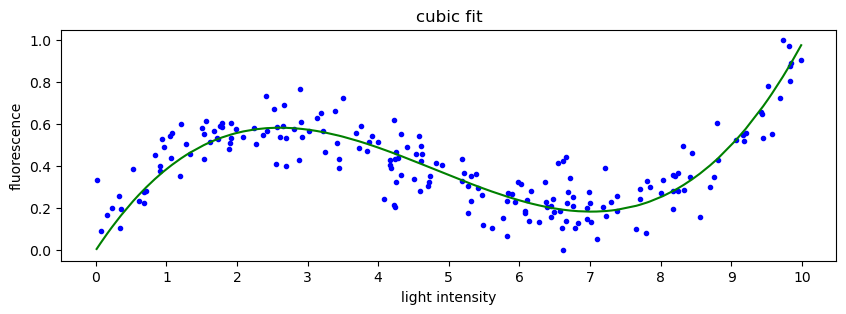

PyObject Text(0.5, 1.0, 'cubic fit')

In [108]:
plot2(x, value.(A*u))

### b) Spline fit

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-24
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 6 columns and 7 nonzeros
Model fingerprint: 0x9c587130
Model has 12 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [7e+01, 5e+03]
  QObjective range [2e+02, 7e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 1 rows and 1 columns
Presolve time: 0.00s
Presolved: 1 rows, 5 columns, 5 nonzeros
Presolved model has 9 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 8
 AA' NZ     : 4.000e+00
 Factor NZ  : 1.000e+01
 Factor Ops : 3.000e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective            

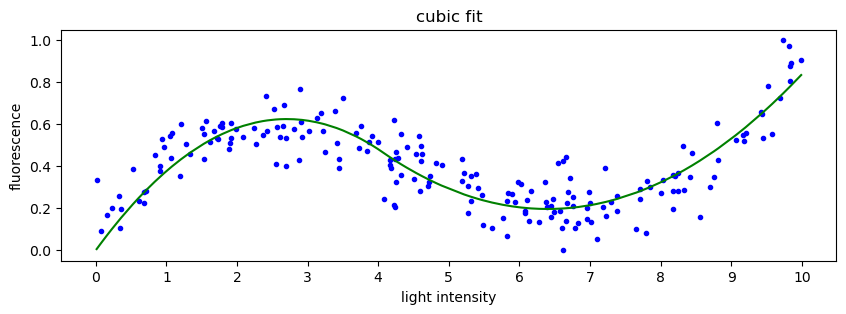

PyObject Text(0.5, 1.0, 'cubic fit')

In [64]:
using Gurobi

# Order of polynomial used for fitting
k = 2

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
count = 0
for i = 1:n
    if 0 <= x[i] < 4
        count = count + 1
    end
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end


m = Model(Gurobi.Optimizer)

@variable(m, u[1:k+1, 1:2])
@expression(m, yopt, A*u)
@constraint(m, u[k+1, 1] == 0)
@constraint(m, sum(4^(k+1-j)*u[j, 1] for j in 1:k+1) == sum(4^(k+1-j)*u[j, 2] for j in 1:k+1))
@objective(m, Min, sum( (y[i] - yopt[i, 1])^2 for i in 1:count ) + sum( (y[i] - yopt[i, 2])^2 for i in count+1:n ) )

optimize!(m)

yarr = zeros(n)
for i = 1:count
    yarr[i] = value.(yopt)[i, 1]
end
for i = count+1:n
    yarr[i] = value.(yopt)[i, 2]
end
plot2(x, value.(yarr))

## Q3

In [92]:
# some dummy code that can be modified to make the plots in Q3. 
# Of course, you will have to change the data ax and bx to be output from the optimization models.
using PyPlot

function plot3(ax, bx)
    
#     ax=ax';
#     bx=bx';


    plot(ax[1,:], ax[2,:],"b.-", label = "Alice")
    plot(bx[1,:], bx[2,:],"r.-", label = "Bob")
    xlabel("East-West (miles)")
    ylabel("North-South (miles)")
    legend(loc = "upper left")
    grid()
    axis("equal")
    title("Minimum-energy rendezvous");
end

plot3 (generic function with 1 method)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-24
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 482 rows, 720 columns and 1428 nonzeros
Model fingerprint: 0xca02a7a4
Model has 240 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-01, 3e+01]
Presolve removed 480 rows and 488 columns
Presolve time: 0.00s
Presolved: 2 rows, 232 columns, 232 nonzeros
Presolved model has 232 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 232
 AA' NZ     : 0.000e+00
 Factor NZ  : 2.000e+00
 Factor Ops : 2.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  O

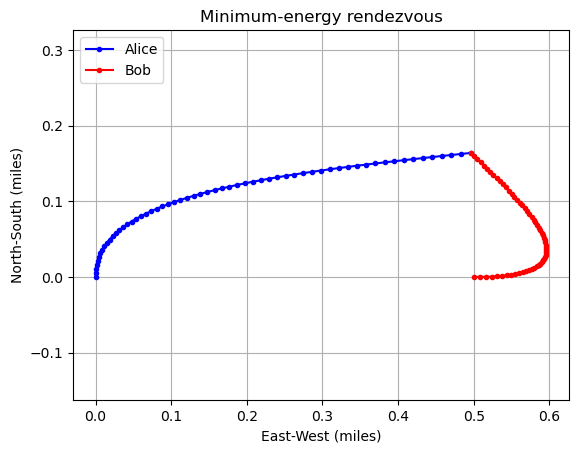

PyObject Text(0.5, 1.0, 'Minimum-energy rendezvous')

In [111]:
using Gurobi

T = 60
m = Model(Gurobi.Optimizer)

# first index: 1-Alice 2-bob
# second index: 
#     1-east 2-north (for velocity/thruster input)
#     1-x 2-y (for position)
# third index: time
@variable(m, xa[1:2, 1:T])  
@variable(m, va[1:2, 1:T])  
@variable(m, ua[1:2, 1:T]) 
@variable(m, xb[1:2, 1:T])
@variable(m, vb[1:2, 1:T])
@variable(m, ub[1:2, 1:T])

@constraint(m, va[:,1] .== [0;20])
@constraint(m, vb[:,1] .== [30;0])
@constraint(m, xb[:,1] .== [0.5;0])
@constraint(m, xa[:,1] .== [0;0])
for t in 1:59
    @constraint(m, xa[:,t+1] .== xa[:,t] + va[:,t]/3600)
    @constraint(m, va[:,t+1] .== va[:,t] + ua[:,t])
    @constraint(m, xb[:,t+1] .== xb[:,t] + vb[:,t]/3600)
    @constraint(m, vb[:,t+1] .== vb[:,t] + ub[:,t])
end
@constraint(m, xb[:,T] .== xa[:,T])
@objective(m, Min, sum(ua.^2)+sum(ub.^2))
        
optimize!(m)

plot3(value.(xa), value.(xb))


In [112]:
println(value.(xa[:,T]))

[0.4958333333333333, 0.16388888888888892]


Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-24
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 486 rows, 720 columns and 1432 nonzeros
Model fingerprint: 0xc98651b3
Model has 240 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-01, 3e+01]
Presolve removed 480 rows and 484 columns
Presolve time: 0.00s
Presolved: 6 rows, 236 columns, 468 nonzeros
Presolved model has 236 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 236
 AA' NZ     : 4.000e+00
 Factor NZ  : 1.200e+01
 Factor Ops : 2.800e+01 (less than 1 second per iteration)
 Threads    : 1

                  O

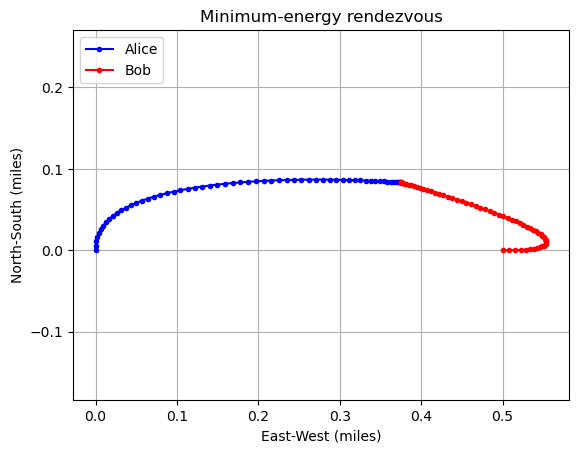

PyObject Text(0.5, 1.0, 'Minimum-energy rendezvous')

In [113]:
using Gurobi

T = 60
m = Model(Gurobi.Optimizer)

# first index: 1-Alice 2-bob
# second index: 
#     1-east 2-north (for velocity/thruster input)
#     1-x 2-y (for position)
# third index: time
@variable(m, xa[1:2, 1:T])  
@variable(m, va[1:2, 1:T])  
@variable(m, ua[1:2, 1:T]) 
@variable(m, xb[1:2, 1:T])
@variable(m, vb[1:2, 1:T])
@variable(m, ub[1:2, 1:T])

@constraint(m, va[:,1] .== [0;20])
@constraint(m, vb[:,1] .== [30;0])
@constraint(m, xb[:,1] .== [0.5;0])
@constraint(m, xa[:,1] .== [0;0])
for t in 1:59
    @constraint(m, xa[:,t+1] .== xa[:,t] + va[:,t]/3600)
    @constraint(m, va[:,t+1] .== va[:,t] + ua[:,t])
    @constraint(m, xb[:,t+1] .== xb[:,t] + vb[:,t]/3600)
    @constraint(m, vb[:,t+1] .== vb[:,t] + ub[:,t])
end
@constraint(m, xb[:,T] .== xa[:,T])
@constraint(m, vb[:,T] .== [0;0])
@constraint(m, va[:,T] .== [0;0])
@objective(m, Min, sum(ua.^2)+sum(ub.^2))
        
optimize!(m)

plot3(value.(xa), value.(xb))


In [114]:
println(value.(xa[:,T]))

[0.37499999999999994, 0.08333333333333333]


The optimal rendezvous location are different.